In [1]:
import tensorflow as tf
import pandas as pd
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)
# import kagglehub
# 
# # Download latest version
# path = kagglehub.dataset_download("nitishabharathi/scene-classification")
# 
# print("Path to dataset files:", path)

In [2]:
train_df = pd.read_csv('nitishabharathi/scene-classification/versions/1/train-scene classification/train.csv',dtype=str)
test_df = pd.read_csv('nitishabharathi/scene-classification/versions/1/test_WyRytb0.csv',dtype=str)
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_gen = datagen.flow_from_dataframe(dataframe=train_df, 
                                        directory="nitishabharathi/scene-classification/versions/1/train-scene "
                                                  "classification/train", x_col="image_name", y_col="label", 
                                        subset="training", batch_size=32, class_mode='categorical', shuffle=True, 
                                        seed=42, target_size=(150, 150))
valid_gen = datagen.flow_from_dataframe(dataframe=train_df, 
                                        directory="nitishabharathi/scene-classification/versions/1/train-scene "
                                                  "classification/train", x_col="image_name", y_col="label", 
                                        subset="validation", batch_size=32, class_mode='categorical', shuffle=True, 
                                        seed=42, target_size=(150, 150))
test_gen = datagen.flow_from_dataframe(dataframe=test_df, 
                                        directory="nitishabharathi/scene-classification/versions/1/train-scene "
                                                  "classification/train", x_col="image_name", y_col=None, 
                                        batch_size=32, class_mode=None, shuffle=False, 
                                        seed=42, target_size=(150, 150))

Found 13628 validated image filenames belonging to 6 classes.
Found 3406 validated image filenames belonging to 6 classes.
Found 7301 validated image filenames.


In [3]:
import matplotlib.pyplot as plt
def loss_plot(history_):
    loss     = history_.history['loss']
    val_loss = history_.history['val_loss']
    epochs   = range(len(loss))
    plt.figure()
    plt.plot  ( epochs,loss )
    plt.plot  ( epochs,val_loss )
    plt.title ('Training and validation loss')
def acc_plot(history_):
    acc = history_.history['accuracy']
    val_acc  = history_.history[ 'val_accuracy' ]
    epochs   = range(len(acc))
    plt.figure()
    plt.plot  ( epochs,     acc )
    plt.plot  ( epochs, val_acc )
    plt.title ('Training and validation accuracy')

Epoch 1/10
426/426 - 105s - loss: 0.9466 - accuracy: 0.6443 - val_loss: 0.7091 - val_accuracy: 0.7469 - 105s/epoch - 246ms/step
Epoch 2/10
426/426 - 15s - loss: 0.6303 - accuracy: 0.7764 - val_loss: 0.8007 - val_accuracy: 0.6923 - 15s/epoch - 34ms/step
Epoch 3/10
426/426 - 14s - loss: 0.5111 - accuracy: 0.8164 - val_loss: 0.5328 - val_accuracy: 0.8206 - 14s/epoch - 34ms/step
Epoch 4/10
426/426 - 14s - loss: 0.4072 - accuracy: 0.8570 - val_loss: 0.5312 - val_accuracy: 0.8262 - 14s/epoch - 34ms/step
Epoch 5/10
426/426 - 15s - loss: 0.3169 - accuracy: 0.8913 - val_loss: 0.5774 - val_accuracy: 0.8142 - 15s/epoch - 34ms/step
Epoch 6/10
426/426 - 15s - loss: 0.2405 - accuracy: 0.9155 - val_loss: 0.7007 - val_accuracy: 0.7810 - 15s/epoch - 35ms/step
Epoch 7/10
426/426 - 15s - loss: 0.1660 - accuracy: 0.9406 - val_loss: 0.8010 - val_accuracy: 0.7772 - 15s/epoch - 34ms/step
Epoch 8/10
426/426 - 14s - loss: 0.1119 - accuracy: 0.9630 - val_loss: 0.9226 - val_accuracy: 0.7695 - 14s/epoch - 34ms/st

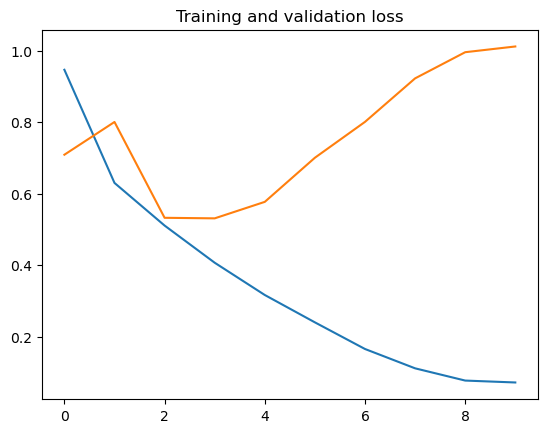

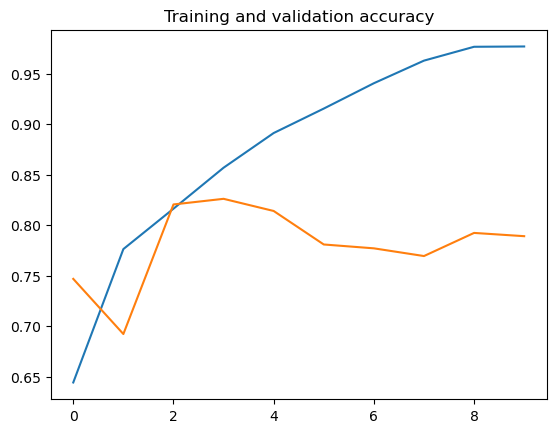

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='softmax')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, epochs=10, validation_data=valid_gen, verbose=2)
loss_plot(history)
acc_plot(history)

Added regularizers, Dense and dropout layers, changed 128 to 96, added early_stopping

Epoch 1/10
426/426 - 203s - loss: 1.0445 - accuracy: 0.6634 - val_loss: 0.7277 - val_accuracy: 0.7396 - 203s/epoch - 477ms/step
Epoch 2/10
426/426 - 200s - loss: 0.4957 - accuracy: 0.8357 - val_loss: 0.6274 - val_accuracy: 0.7854 - 200s/epoch - 470ms/step
Epoch 3/10
426/426 - 196s - loss: 0.2373 - accuracy: 0.9307 - val_loss: 0.7631 - val_accuracy: 0.7754 - 196s/epoch - 461ms/step
Epoch 4/10
426/426 - 200s - loss: 0.1338 - accuracy: 0.9697 - val_loss: 0.8588 - val_accuracy: 0.7763 - 200s/epoch - 470ms/step
Epoch 5/10
426/426 - 204s - loss: 0.0971 - accuracy: 0.9817 - val_loss: 0.8141 - val_accuracy: 0.7936 - 204s/epoch - 480ms/step


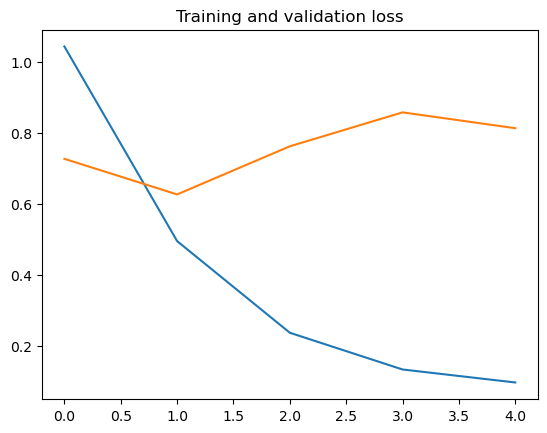

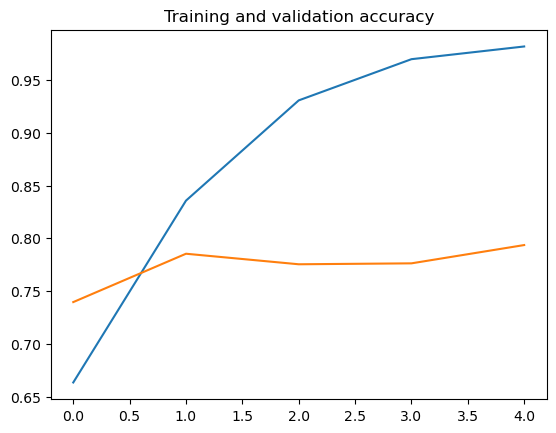

In [59]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3), activity_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(96, (3,3), activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, epochs=10, validation_data=valid_gen, verbose=2, callbacks=[early_stopping])
loss_plot(history)
acc_plot(history)

In [4]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

train_gen = train_datagen.flow_from_dataframe(dataframe=train_df, 
                                        directory="nitishabharathi/scene-classification/versions/1/train-scene "
                                                  "classification/train", x_col="image_name", y_col="label", 
                                        subset="training", batch_size=32, class_mode='categorical', shuffle=True, 
                                        seed=42, target_size=(150, 150))
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)
valid_gen = valid_datagen.flow_from_dataframe(dataframe=train_df, 
                                        directory="nitishabharathi/scene-classification/versions/1/train-scene "
                                                  "classification/train", x_col="image_name", y_col="label", 
                                        subset="validation", batch_size=32, class_mode='categorical', shuffle=True, 
                                        seed=42, target_size=(150, 150))

Found 17034 validated image filenames belonging to 6 classes.
Found 3406 validated image filenames belonging to 6 classes.


Epoch 1/10
533/533 - 94s - loss: 1.4604 - accuracy: 0.5780 - val_loss: 0.9341 - val_accuracy: 0.7020 - 94s/epoch - 177ms/step
Epoch 2/10
533/533 - 91s - loss: 0.9420 - accuracy: 0.6657 - val_loss: 0.9115 - val_accuracy: 0.6973 - 91s/epoch - 171ms/step
Epoch 3/10
533/533 - 89s - loss: 0.8942 - accuracy: 0.6818 - val_loss: 0.7665 - val_accuracy: 0.7537 - 89s/epoch - 167ms/step
Epoch 4/10
533/533 - 88s - loss: 0.8471 - accuracy: 0.7034 - val_loss: 0.7221 - val_accuracy: 0.7780 - 88s/epoch - 165ms/step
Epoch 5/10
533/533 - 84s - loss: 0.8243 - accuracy: 0.7123 - val_loss: 0.7715 - val_accuracy: 0.7698 - 84s/epoch - 158ms/step
Epoch 6/10
533/533 - 89s - loss: 0.7848 - accuracy: 0.7280 - val_loss: 0.6863 - val_accuracy: 0.7933 - 89s/epoch - 166ms/step
Epoch 7/10
533/533 - 100s - loss: 0.7701 - accuracy: 0.7372 - val_loss: 0.7175 - val_accuracy: 0.7889 - 100s/epoch - 189ms/step
Epoch 8/10
533/533 - 100s - loss: 0.7536 - accuracy: 0.7439 - val_loss: 0.8271 - val_accuracy: 0.7413 - 100s/epoch -

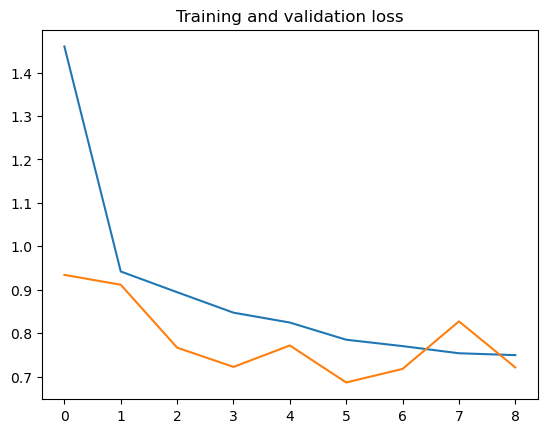

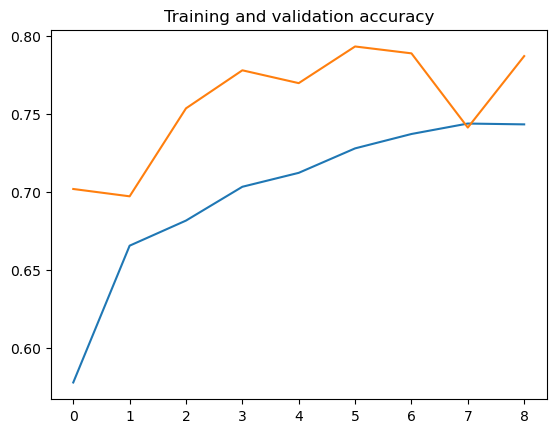

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3), activity_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(96, (3,3), activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, epochs=10, validation_data=valid_gen, verbose=2, callbacks=[early_stopping])
loss_plot(history)
acc_plot(history)

Added learning rate scheduler, changed model structure(added one more Conv2D + Pooling, reduced 512 to 256 on Dense 
layer, Dropout changed to 0.4), changed learning rate

Epoch 1/10
533/533 - 187s - loss: 1.9356 - accuracy: 0.5384 - val_loss: 1.1649 - val_accuracy: 0.6703 - lr: 5.0000e-04 - 187s/epoch - 351ms/step
Epoch 2/10
533/533 - 86s - loss: 1.1590 - accuracy: 0.6274 - val_loss: 1.0339 - val_accuracy: 0.7228 - lr: 5.0000e-04 - 86s/epoch - 161ms/step
Epoch 3/10
533/533 - 85s - loss: 1.1000 - accuracy: 0.6509 - val_loss: 0.9951 - val_accuracy: 0.7378 - lr: 5.0000e-04 - 85s/epoch - 159ms/step
Epoch 4/10
533/533 - 81s - loss: 1.0593 - accuracy: 0.6641 - val_loss: 0.9296 - val_accuracy: 0.7560 - lr: 5.0000e-04 - 81s/epoch - 152ms/step
Epoch 5/10
533/533 - 128s - loss: 1.0503 - accuracy: 0.6656 - val_loss: 1.0108 - val_accuracy: 0.7205 - lr: 5.0000e-04 - 128s/epoch - 240ms/step
Epoch 6/10
533/533 - 108s - loss: 1.0126 - accuracy: 0.6829 - val_loss: 1.0565 - val_accuracy: 0.7061 - lr: 5.0000e-04 - 108s/epoch - 203ms/step
Epoch 7/10
533/533 - 74s - loss: 0.9434 - accuracy: 0.7112 - val_loss: 0.8509 - val_accuracy: 0.7733 - lr: 2.5000e-04 - 74s/epoch - 139m

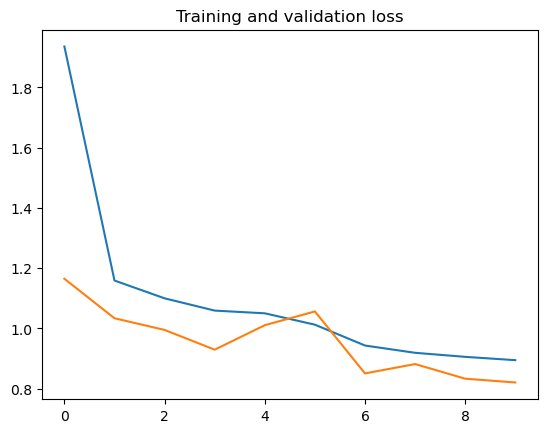

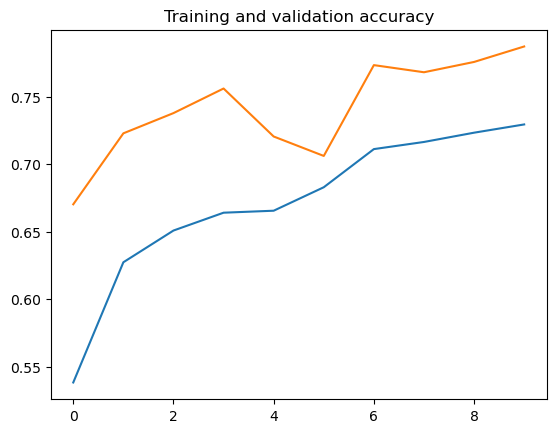

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3), activity_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(96, (3,3), activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', 
                           activity_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(6, activation='softmax')
])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                     factor=0.5, 
                                                     patience=2, 
                                                     min_lr=1e-6)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, epochs=10, validation_data=valid_gen, verbose=2, callbacks=[early_stopping, lr_scheduler])
loss_plot(history)
acc_plot(history)

Added more epochs

Epoch 1/15
533/533 - 205s - loss: 1.5980 - accuracy: 0.5373 - val_loss: 1.0436 - val_accuracy: 0.6944 - lr: 5.0000e-04 - 205s/epoch - 384ms/step
Epoch 2/15
533/533 - 169s - loss: 1.1341 - accuracy: 0.6284 - val_loss: 1.0722 - val_accuracy: 0.6988 - lr: 5.0000e-04 - 169s/epoch - 318ms/step
Epoch 3/15
533/533 - 88s - loss: 1.0932 - accuracy: 0.6418 - val_loss: 1.0459 - val_accuracy: 0.6947 - lr: 5.0000e-04 - 88s/epoch - 165ms/step
Epoch 4/15
533/533 - 102s - loss: 1.0098 - accuracy: 0.6775 - val_loss: 0.9753 - val_accuracy: 0.7211 - lr: 2.5000e-04 - 102s/epoch - 191ms/step
Epoch 5/15
533/533 - 87s - loss: 0.9812 - accuracy: 0.6865 - val_loss: 0.8908 - val_accuracy: 0.7513 - lr: 2.5000e-04 - 87s/epoch - 164ms/step
Epoch 6/15
533/533 - 83s - loss: 0.9642 - accuracy: 0.6959 - val_loss: 0.9577 - val_accuracy: 0.7225 - lr: 2.5000e-04 - 83s/epoch - 156ms/step
Epoch 7/15
533/533 - 89s - loss: 0.9450 - accuracy: 0.7035 - val_loss: 0.8533 - val_accuracy: 0.7716 - lr: 2.5000e-04 - 89s/epoch - 167m

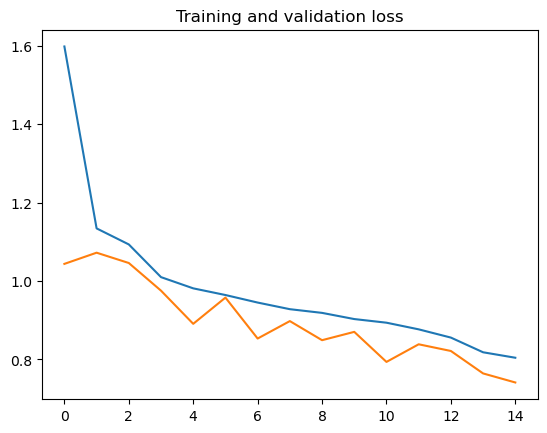

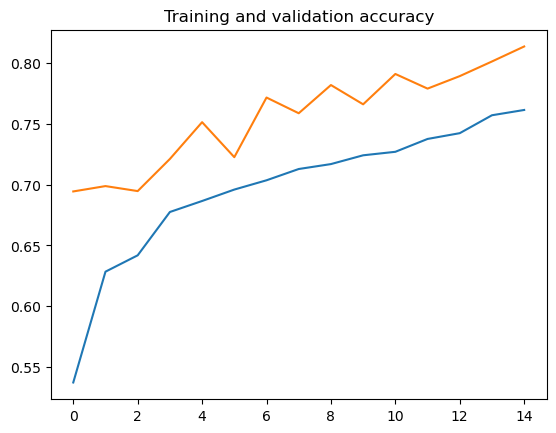

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3), activity_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(96, (3,3), activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', 
                           activity_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(6, activation='softmax')
])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                     factor=0.5, 
                                                     patience=2, 
                                                     min_lr=1e-6)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, epochs=15, validation_data=valid_gen, verbose=2, callbacks=[early_stopping, 
                                                                                           lr_scheduler])
loss_plot(history)
acc_plot(history)

Changed filter numbers and learning rate

Epoch 1/15
533/533 - 149s - loss: 1.5308 - accuracy: 0.4952 - val_loss: 1.3116 - val_accuracy: 0.5408 - lr: 0.0010 - 149s/epoch - 280ms/step
Epoch 2/15
533/533 - 98s - loss: 1.1503 - accuracy: 0.5930 - val_loss: 1.1405 - val_accuracy: 0.6459 - lr: 0.0010 - 98s/epoch - 184ms/step
Epoch 3/15
533/533 - 87s - loss: 1.0865 - accuracy: 0.6243 - val_loss: 0.9426 - val_accuracy: 0.7099 - lr: 0.0010 - 87s/epoch - 164ms/step
Epoch 4/15
533/533 - 86s - loss: 1.0462 - accuracy: 0.6456 - val_loss: 0.9224 - val_accuracy: 0.7140 - lr: 0.0010 - 86s/epoch - 162ms/step
Epoch 5/15
533/533 - 86s - loss: 1.0094 - accuracy: 0.6636 - val_loss: 0.8772 - val_accuracy: 0.7507 - lr: 0.0010 - 86s/epoch - 162ms/step
Epoch 6/15
533/533 - 86s - loss: 0.9809 - accuracy: 0.6852 - val_loss: 0.9708 - val_accuracy: 0.7243 - lr: 0.0010 - 86s/epoch - 161ms/step
Epoch 7/15
533/533 - 88s - loss: 0.9429 - accuracy: 0.7028 - val_loss: 0.8370 - val_accuracy: 0.7728 - lr: 0.0010 - 88s/epoch - 165ms/step
Epoch 8/15
533/533 - 93s 

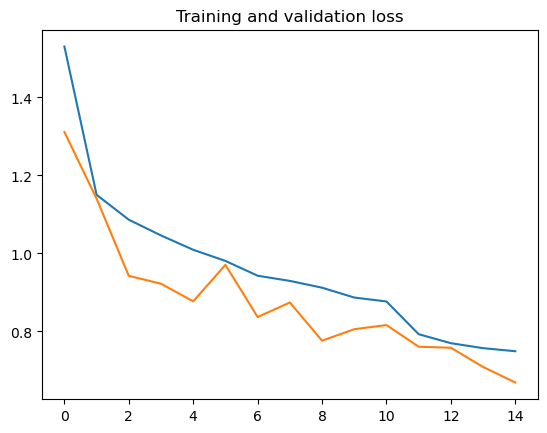

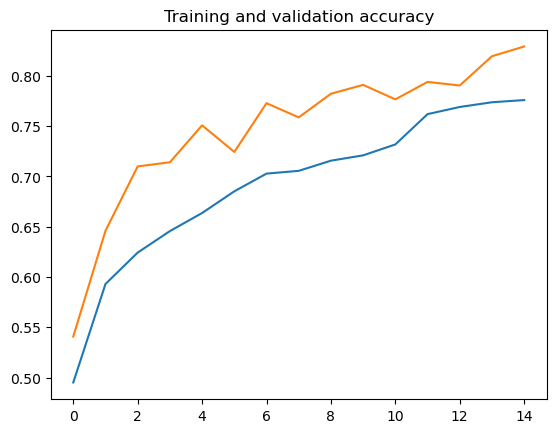

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3), activity_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', 
                           activity_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', 
                           activity_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(6, activation='softmax')
])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                     factor=0.5, 
                                                     patience=2, 
                                                     min_lr=1e-6)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, epochs=15, validation_data=valid_gen, verbose=2, callbacks=[early_stopping,lr_scheduler])
loss_plot(history)
acc_plot(history)

Added more epochs and changed lr_scheduler factor

Epoch 1/20
533/533 - 187s - loss: 2.0218 - accuracy: 0.4889 - val_loss: 1.2259 - val_accuracy: 0.5793 - lr: 0.0010 - 187s/epoch - 351ms/step
Epoch 2/20
533/533 - 74s - loss: 1.1951 - accuracy: 0.5747 - val_loss: 0.9824 - val_accuracy: 0.7149 - lr: 0.0010 - 74s/epoch - 139ms/step
Epoch 3/20
533/533 - 84s - loss: 1.1084 - accuracy: 0.6213 - val_loss: 1.0088 - val_accuracy: 0.6952 - lr: 0.0010 - 84s/epoch - 158ms/step
Epoch 4/20
533/533 - 82s - loss: 1.0635 - accuracy: 0.6436 - val_loss: 0.9577 - val_accuracy: 0.7090 - lr: 0.0010 - 82s/epoch - 154ms/step
Epoch 5/20
533/533 - 86s - loss: 1.0296 - accuracy: 0.6586 - val_loss: 0.9874 - val_accuracy: 0.7161 - lr: 0.0010 - 86s/epoch - 162ms/step
Epoch 6/20
533/533 - 85s - loss: 0.9953 - accuracy: 0.6822 - val_loss: 0.9086 - val_accuracy: 0.7378 - lr: 0.0010 - 85s/epoch - 159ms/step
Epoch 7/20
533/533 - 85s - loss: 0.9721 - accuracy: 0.6884 - val_loss: 1.0291 - val_accuracy: 0.6814 - lr: 0.0010 - 85s/epoch - 159ms/step
Epoch 8/20
533/533 - 83s 

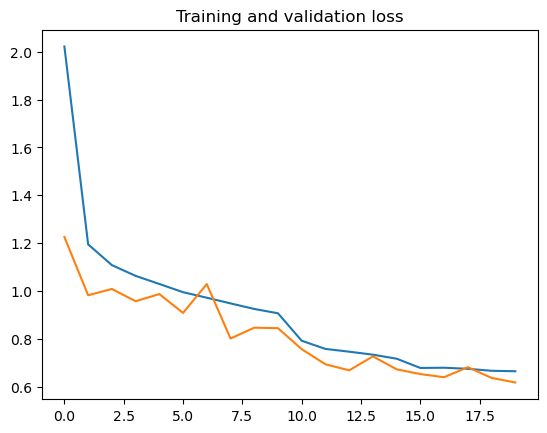

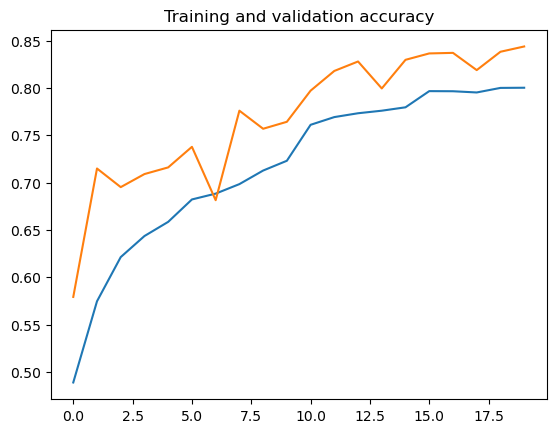

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3), activity_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', 
                           activity_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', 
                           activity_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(6, activation='softmax')
])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                     factor=0.25, 
                                                     patience=2, 
                                                     min_lr=1e-6)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_gen, epochs=20, validation_data=valid_gen, verbose=2, callbacks=[early_stopping,lr_scheduler])
loss_plot(history)
acc_plot(history)

Epoch 1/15
533/533 - 124s - loss: 1.1018 - accuracy: 0.6059 - val_loss: 0.7012 - val_accuracy: 0.7719 - lr: 0.0010 - 124s/epoch - 232ms/step
Epoch 2/15
533/533 - 109s - loss: 0.7732 - accuracy: 0.7238 - val_loss: 0.5842 - val_accuracy: 0.8033 - lr: 0.0010 - 109s/epoch - 204ms/step
Epoch 3/15
533/533 - 100s - loss: 0.7048 - accuracy: 0.7437 - val_loss: 0.5375 - val_accuracy: 0.8171 - lr: 0.0010 - 100s/epoch - 187ms/step
Epoch 4/15
533/533 - 99s - loss: 0.6728 - accuracy: 0.7533 - val_loss: 0.5146 - val_accuracy: 0.8150 - lr: 0.0010 - 99s/epoch - 186ms/step
Epoch 5/15
533/533 - 99s - loss: 0.6550 - accuracy: 0.7584 - val_loss: 0.4913 - val_accuracy: 0.8259 - lr: 0.0010 - 99s/epoch - 185ms/step
Epoch 6/15
533/533 - 97s - loss: 0.6389 - accuracy: 0.7619 - val_loss: 0.4737 - val_accuracy: 0.8379 - lr: 0.0010 - 97s/epoch - 182ms/step
Epoch 7/15
533/533 - 97s - loss: 0.6332 - accuracy: 0.7651 - val_loss: 0.4585 - val_accuracy: 0.8394 - lr: 0.0010 - 97s/epoch - 182ms/step
Epoch 8/15
533/533 - 

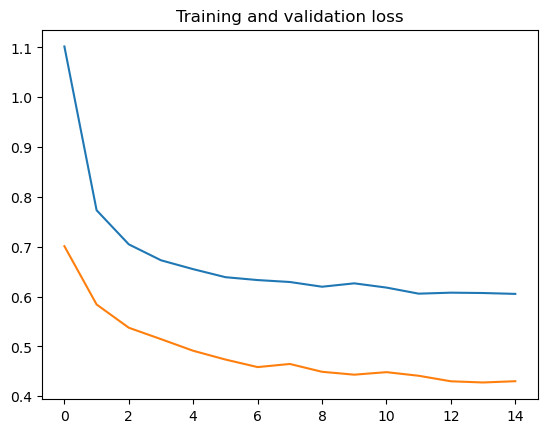

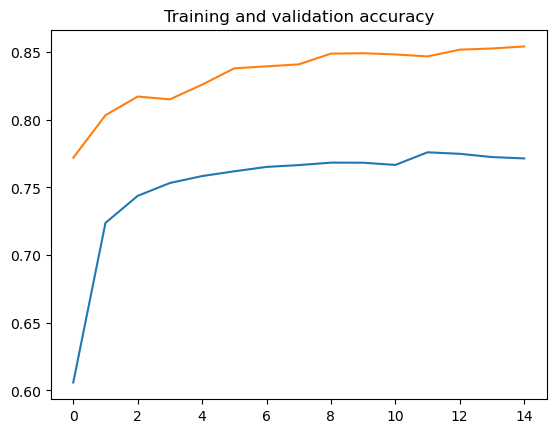

In [5]:
base_model = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', input_shape=(150,150,3))
base_model.trainable = False
new_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                     factor=0.5, 
                                                     patience=2, 
                                                     min_lr=1e-6)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
new_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = new_model.fit(train_gen, epochs=15, validation_data=valid_gen, verbose=2, callbacks=[early_stopping,lr_scheduler])
loss_plot(history)
acc_plot(history)

Epoch 1/15
533/533 - 249s - loss: 1.2629 - accuracy: 0.4728 - val_loss: 0.9393 - val_accuracy: 0.6439 - lr: 0.0010 - 249s/epoch - 467ms/step
Epoch 2/15
533/533 - 215s - loss: 1.0393 - accuracy: 0.5885 - val_loss: 0.8084 - val_accuracy: 0.6967 - lr: 0.0010 - 215s/epoch - 404ms/step
Epoch 3/15
533/533 - 215s - loss: 0.9056 - accuracy: 0.6515 - val_loss: 0.6969 - val_accuracy: 0.7410 - lr: 0.0010 - 215s/epoch - 404ms/step
Epoch 4/15
533/533 - 215s - loss: 0.7907 - accuracy: 0.7048 - val_loss: 0.5911 - val_accuracy: 0.7880 - lr: 0.0010 - 215s/epoch - 403ms/step
Epoch 5/15
533/533 - 229s - loss: 0.7080 - accuracy: 0.7410 - val_loss: 0.5240 - val_accuracy: 0.8174 - lr: 0.0010 - 229s/epoch - 430ms/step
Epoch 6/15
533/533 - 220s - loss: 0.6575 - accuracy: 0.7637 - val_loss: 0.5379 - val_accuracy: 0.8159 - lr: 0.0010 - 220s/epoch - 413ms/step
Epoch 7/15
533/533 - 216s - loss: 0.6088 - accuracy: 0.7795 - val_loss: 0.4561 - val_accuracy: 0.8420 - lr: 0.0010 - 216s/epoch - 406ms/step
Epoch 8/15
53

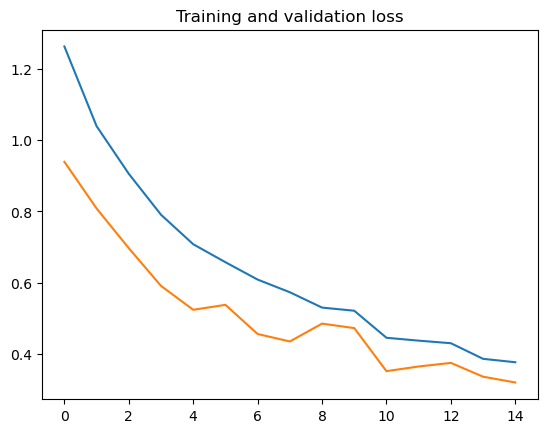

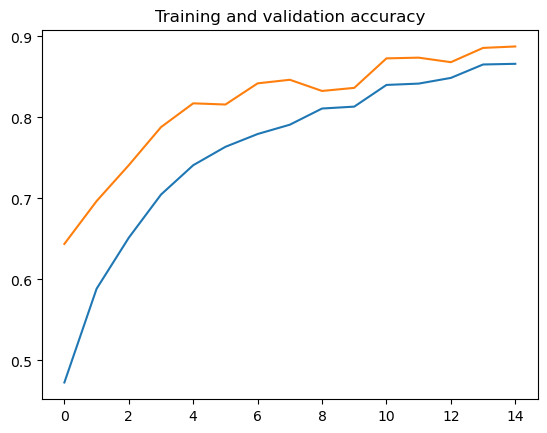

In [7]:
base_model = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', input_shape=(150,150,3))
for layer in base_model.layers[-10:]:
    layer.trainable = False
new_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                     factor=0.5, 
                                                     patience=2, 
                                                     min_lr=1e-6)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
new_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = new_model.fit(train_gen, epochs=15, validation_data=valid_gen, verbose=2, callbacks=[early_stopping,lr_scheduler])
loss_plot(history)
acc_plot(history)

Epoch 1/15
533/533 - 238s - loss: 1.1145 - accuracy: 0.5507 - val_loss: 0.6905 - val_accuracy: 0.7510 - lr: 1.0000e-04 - 238s/epoch - 447ms/step
Epoch 2/15
533/533 - 218s - loss: 0.7559 - accuracy: 0.7262 - val_loss: 0.5524 - val_accuracy: 0.8045 - lr: 1.0000e-04 - 218s/epoch - 410ms/step
Epoch 3/15
533/533 - 218s - loss: 0.6321 - accuracy: 0.7755 - val_loss: 0.4903 - val_accuracy: 0.8294 - lr: 1.0000e-04 - 218s/epoch - 408ms/step
Epoch 4/15
533/533 - 218s - loss: 0.5577 - accuracy: 0.8010 - val_loss: 0.4595 - val_accuracy: 0.8503 - lr: 1.0000e-04 - 218s/epoch - 408ms/step
Epoch 5/15
533/533 - 217s - loss: 0.5187 - accuracy: 0.8170 - val_loss: 0.3895 - val_accuracy: 0.8729 - lr: 1.0000e-04 - 217s/epoch - 407ms/step
Epoch 6/15
533/533 - 217s - loss: 0.4788 - accuracy: 0.8319 - val_loss: 0.3620 - val_accuracy: 0.8770 - lr: 1.0000e-04 - 217s/epoch - 408ms/step
Epoch 7/15
533/533 - 217s - loss: 0.4507 - accuracy: 0.8444 - val_loss: 0.3376 - val_accuracy: 0.8840 - lr: 1.0000e-04 - 217s/epoc

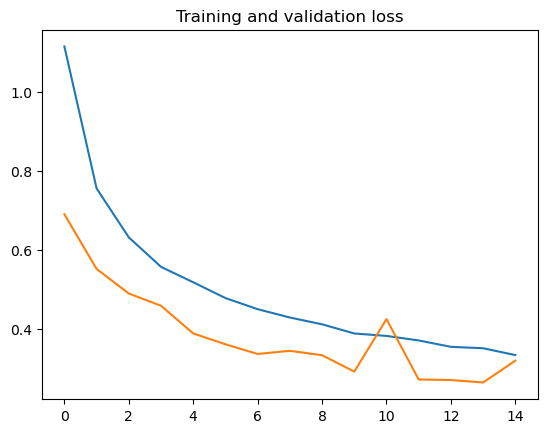

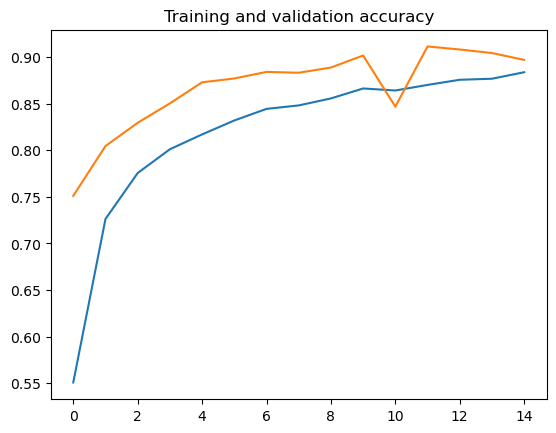

In [5]:
base_model = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', input_shape=(150,150,3))
for layer in base_model.layers[-10:]:
    layer.trainable = False
new_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                                     factor=0.5, 
                                                     patience=2, 
                                                     min_lr=1e-6)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
new_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = new_model.fit(train_gen, epochs=15, validation_data=valid_gen, verbose=2, callbacks=[early_stopping,lr_scheduler])
loss_plot(history)
acc_plot(history)

In [6]:
new_model.save('scene_model.keras')

In [4]:
base_model = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', input_shape=(150,150,3))
for layer in base_model.layers[-10:]:
    layer.trainable = False
new_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
new_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
new_model.load_weights('scene_model.keras')
new_model.evaluate(valid_gen, verbose=2)

107/107 - 77s - loss: 0.3207 - accuracy: 0.8969 - 77s/epoch - 716ms/step


[0.32065147161483765, 0.8969465494155884]

1/1 [==============================] - 4s 4s/step
Predicted probabilities for image 0:
[[8.9157111e-06 6.1529054e-06 6.1098604e-07 9.2267749e-09 3.4834304e-08
  9.9998426e-01]]
Predicted class: 5
1/1 [==============================] - 0s 50ms/step
Predicted probabilities for image 1:
[[9.9787807e-01 2.3364779e-08 7.5716935e-07 1.5089981e-08 7.1738141e-06
  2.1140818e-03]]
Predicted class: 0
1/1 [==============================] - 0s 35ms/step
Predicted probabilities for image 2:
[[4.5459132e-07 6.5522755e-08 2.7731825e-03 1.4439203e-05 9.9720252e-01
  9.3792514e-06]]
Predicted class: 4
1/1 [==============================] - 0s 39ms/step
Predicted probabilities for image 3:
[[2.7785773e-05 2.2161370e-05 9.9253815e-01 3.0996264e-03 2.3636958e-03
  1.9485787e-03]]
Predicted class: 2
1/1 [==============================] - 0s 42ms/step
Predicted probabilities for image 4:
[[3.6169274e-04 8.1912640e-07 9.2100854e-06 7.2090167e-08 1.4687942e-06
  9.9962676e-01]]
Predicted class: 5
1/1 [=======

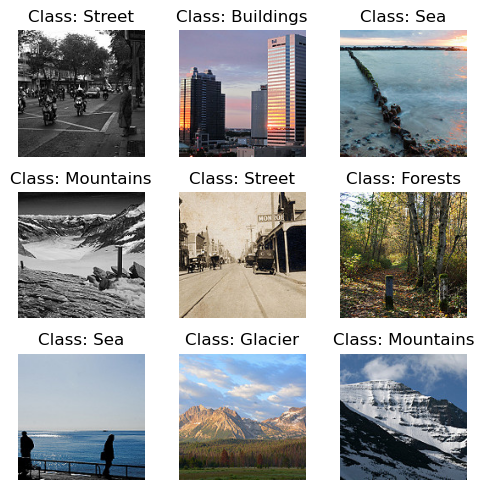

In [5]:
labels = {1: 'Buildings', 2: 'Forests', 3: 'Mountains', 4: 'Glacier', 6: 'Street', 5: 'Sea'}
images = next(test_gen)
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    img = images[i][None, ...]
    prediction = new_model.predict(img)
    print(f"Predicted probabilities for image {i}:")
    print(prediction)
    predicted_class = tf.argmax(prediction[0]).numpy()
    print(f"Predicted class: {predicted_class}")
    plt.title(f"Class: {labels[predicted_class + 1]}")
    plt.axis("off")
plt.tight_layout()
plt.show()